In [23]:
import torch
from torch_geometric.datasets import TUDataset
from torch_geometric.loader import DataLoader
import torch
# from tqdm import tqdm
from torch_geometric.utils import to_networkx
import networkx as nx
from gnn import GNN
import matplotlib.pyplot as plt
import os
import numpy as np

In [24]:
dataset = TUDataset(root='data/TUDataset', name='MUTAG')
atom_indices = {
    0: "C",
    1: "N",
    2: "O",
    3: "F",
    4: "I",
    5: "Cl",
    6: "Br",
}

edge_indices = {
    0: "aromatic",
    1: "single",
    2: "double",
    3: "triple",
}

In [25]:
model_path = "models/MUTAG_model.pth"
nn = torch.load(model_path)
nn.eval()
nn.double()

GNN(
  (conv1): SAGEConv(7, 32, aggr=mean)
  (conv2): SAGEConv(32, 48, aggr=mean)
  (conv3): SAGEConv(48, 64, aggr=mean)
  (lin1): Linear(in_features=64, out_features=32, bias=True)
  (lin2): Linear(in_features=32, out_features=32, bias=True)
  (lin3): Linear(in_features=32, out_features=2, bias=True)
)

In [26]:
A = np.load("./A.npy")
X = np.load("./X.npy")

In [27]:
X.nonzero(), A.nonzero()

((array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
  array([0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 2, 2])),
 (array([ 0,  1,  1,  2,  2,  3,  3,  3,  4,  4,  5,  5,  6,  6,  7,  7,  7,
          8,  8,  8,  9,  9,  9, 10, 11]),
  array([ 1,  0,  2,  1,  3,  2,  4,  8,  3,  5,  4,  6,  5,  7,  6,  7,  8,
          3,  7,  9,  8, 10, 11,  9,  9])))

In [28]:
A

array([[-0.,  1., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.],
       [ 1.,  0.,  1., -0., -0., -0., -0., -0., -0., -0., -0., -0.],
       [ 0.,  1.,  0.,  1., -0., -0., -0., -0., -0., -0., -0., -0.],
       [ 0.,  0.,  1., -0.,  1., -0., -0., -0.,  1., -0., -0., -0.],
       [ 0.,  0.,  0.,  1., -0.,  1., -0., -0., -0., -0., -0., -0.],
       [ 0.,  0.,  0.,  0.,  1., -0.,  1., -0., -0., -0., -0., -0.],
       [ 0.,  0.,  0.,  0.,  0.,  1., -0.,  1., -0., -0., -0., -0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1., -0., -0., -0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  1., -0.,  1., -0., -0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1., -0.,  1.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1., -0., -0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0., -0.]])

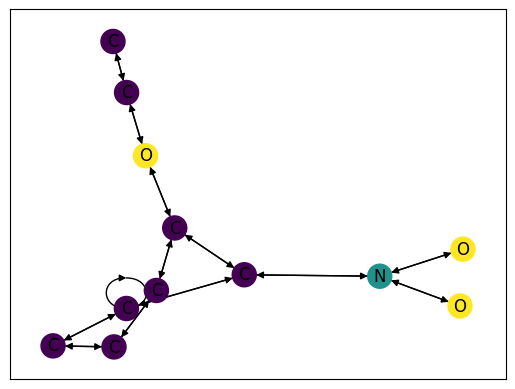

In [29]:
G = nx.from_numpy_array(A, create_using=nx.DiGraph)

labels = dict(zip(range(X.shape[0]), map(atom_indices.get, np.argmax(X, axis=1))))
fig, ax = plt.subplots()
pos = nx.spring_layout(G, seed=7)
x_indices = np.argmax(X, axis=1)
nx.draw_networkx(G, pos=pos, with_labels=True, node_color = x_indices, labels=labels)